# ADS - Network analysis module, homework 1

In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf
from collections import OrderedDict
from operator import itemgetter



Populating the interactive namespace from numpy and matplotlib


In [2]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework1/lesmis.gml
G = nx.read_gml('lesmis.gml')

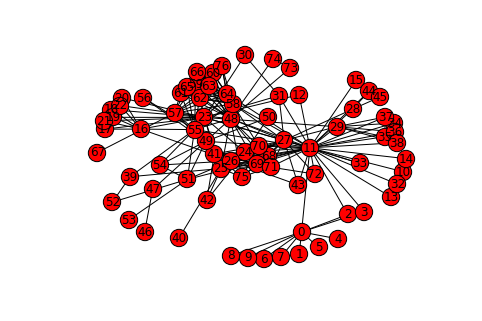

In [3]:
nx.draw(G,with_labels=True)

In [4]:
print(G.nodes(0))  ##pos={1:(50,50),2:(25,50),3:(75,75),4:(75,25),'A':(85,50)}

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]


In [5]:
pos ={i: (i-50,i+50) for i in range(77)}

In [6]:
### calculating the position 
pos={}
for i in range(77):
    if G.degree(i)>7:
        #pos=pos.copy{i: (i-2,i+20)}
        pos[i]=(i-75,i+50)

## Problem 1 (20% of credit) 
Visualize the network with node labes and sizes proportional to node degree

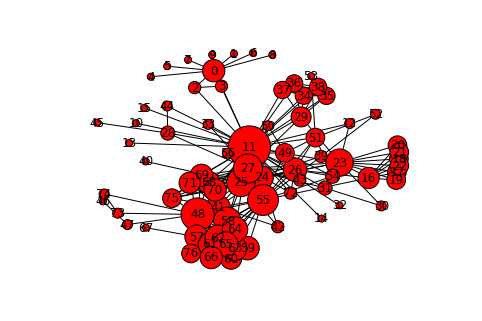

In [8]:
nx.draw(G,node_size=50*np.array(G.degree().values()),with_labels=True)

## Problem 2 (30% of credit)
Output the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) eigenvector centrality;

c) betweenness centrality;

d) closeness centrality;

In [9]:
h=nx.degree_centrality(G)

In [37]:
h=OrderedDict(sorted(h.items(),key=itemgetter(1)))

In [38]:
print 'the nodes and degree centrality are', h.items()[max(G.nodes()):max(G.nodes())-5:-1]

the nodes and degree centrality are [(11, 0.47368421052631576), (48, 0.2894736842105263), (55, 0.25), (27, 0.22368421052631576), (25, 0.21052631578947367)]


In [12]:
h1=nx.betweenness_centrality(G)

In [13]:
h1=OrderedDict(sorted(h1.items(),key=itemgetter(1)))

In [14]:
print 'the nodes and betweeness centrality are', h1.items()[max(G.nodes()):max(G.nodes())-5:-1]

the nodes and betweeness centrality are [(11, 0.5699890527836184), (0, 0.17684210526315788), (48, 0.16511250242584766), (55, 0.132032488621946), (23, 0.12964454098819422)]


In [15]:
h2=nx.closeness_centrality(G)

In [16]:
h2=OrderedDict(sorted(h2.items(),key=itemgetter(1)))

In [17]:
print 'the nodes and closeness centrality are', h2.items()[max(G.nodes()):max(G.nodes())-5:-1]

the nodes and closeness centrality are [(11, 0.6440677966101694), (55, 0.5314685314685315), (27, 0.5170068027210885), (25, 0.5170068027210885), (48, 0.5135135135135135)]


In [18]:
h3=nx.eigenvector_centrality(G)

In [19]:
h3=OrderedDict(sorted(h3.items(),key=itemgetter(1)))

In [20]:
print 'the nodes and eigenvector centrality are', h3.items()[max(G.nodes()):max(G.nodes())-5:-1]

the nodes and eigenvector centrality are [(48, 0.31783957195036283), (11, 0.26761501799997545), (58, 0.26717994448580384), (55, 0.25911166603309926), (64, 0.24213251965285054)]


## Problem 3 (25% of credit)
Analyze the impact of damping parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

So for the values of damping parameter between 0.4 and 0.95 top five nodes are the same, just the order is varied slightly (exactly the same between 0.7 and 0.85). For the values $\alpha=0.1-0.3$ node 55 is replaced with the node 25 in the top 5 list

In [21]:
h4 = nx.pagerank(G,.1)

In [22]:
h4=OrderedDict(sorted(h4.items(),key=itemgetter(1)))

In [23]:
#printing page rank for one alpha value
print 'the nodes and pagerank centrality are', h4.items()[max(G.nodes()):max(G.nodes())-5:-1]

the nodes and pagerank centrality are [(11, 0.024870471094876317), (0, 0.020910423735306046), (48, 0.01579776348483299), (25, 0.015167220377215374), (27, 0.015097087285362508)]


In [24]:
j=.95
while (j>0):
    m = nx.pagerank(G,j)
    m1= OrderedDict(sorted(m.items(),key=itemgetter(1),reverse=True))
    print 'For alpha ', j ,'the  value is ',m1.items()[:5], '\n'  #[max(G.nodes()):max(G.nodes())-5:-1]
    j-=.05

For alpha  0.95 the  value is  [(11, 0.0747043161907721), (48, 0.03955288718377238), (55, 0.03430243839798216), (0, 0.0334606288129395), (27, 0.0323959317526778)] 

For alpha  0.9 the  value is  [(11, 0.07570137903943515), (0, 0.03965531861134032), (48, 0.03739018829226063), (55, 0.03238365765284896), (27, 0.0313463187322299)] 

For alpha  0.85 the  value is  [(11, 0.07543374445332471), (0, 0.04280343976075734), (48, 0.03576412343161934), (55, 0.03089270192040647), (27, 0.03030259712717037)] 

For alpha  0.8 the  value is  [(11, 0.07442184631334867), (0, 0.0443411025859056), (48, 0.03435748592585354), (55, 0.029597643233466878), (27, 0.02926406217500744)] 

For alpha  0.75 the  value is  [(11, 0.07289078169276222), (0, 0.04493881516694716), (48, 0.03304370397047832), (55, 0.028403378270777522), (27, 0.02823136879202941)] 

For alpha  0.7 the  value is  [(11, 0.07095277173283869), (0, 0.0448978476113381), (48, 0.03176794006501972), (55, 0.027267015891693083), (27, 0.027205254098042756)]

# observation : As is evident from the observation ,the value of the page rank decrease as the value of alpha is decreased. Also for the values of damping parameter between 0.4 and 0.95 top five nodes are the same, just the order is varied slightly (exactly the same between 0.7 and 0.85). For the values α=0.1−0.3 node 55 is replaced with the node 25 in the top 5 list


In [29]:
def distribution(x,cdf,params=10):
    xh, xb=np.histogram(log(x),bins=params)
    xh=1.0*xh/len(x)
    xb=(xb[1:]+xb[0:-1])/2
    xb=xb[xh>0]
    xh=xh[xh>0]
    if cdf:
      xh=1-cumsum(xh[:-1])
      xb=xb[:-1]
      plt.ylabel("P(c>=x)")
    else:
      plt.ylabel("p(c=x)")
    plt.loglog(exp(xb),xh,'-b',marker='o')
    plt.xlabel("Centrality, x")

In [34]:
def rankPlot(x,fit=0,params=[]):
  #visualize the rankplot for the array x, fitting it with a power law, lognormal or normal distribution (according to fit) 
  #params - power-law fit cut-off
  xs=sorted(x,reverse=True) # sort the sequence in decreasing order
  plt.loglog(xs,'b-',marker='o') #create a log-log plot of the value vs its rank
  plt.title("Centrality rank plot") #plot title
  #axe labels  
  plt.ylabel("Centrality")
  plt.xlabel("rank")
  fp=[]  
  if fit==1: #power law fit
      xl=np.array(xs)  
      xl=log(xl[xl>0])
      r=log(np.array(range(1,len(xl)+1)))
      data=pd.DataFrame({'x':r,'y':xl})  
      if len(params)==0:
            params=[0, Inf]
      if len(params)==1:
            params=append(params,Inf)
      lm = smf.ols(formula='y ~ x', data = data.loc[(xl>=params[0])&(xl<=params[1])]).fit()
      fp= lm.params.x
      plt.loglog(exp(data.x),exp(lm.predict(data)),'r-',marker='')                   
  if fit==2: #lognormal fit
      xl=log(x[x>0])
      sigma=std(xl)
      mu=mean(xl)  
      fp=sigma
      s=exp(mu)*stat.lognorm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),sigma)[::-1]
      plt.loglog(s,'r-',marker='.')
      plt.title('Plotting the lognormal fit')
  if fit==3: #normal fit
      xl=x[x>0]
      sigma=std(xl)
      mu=mean(xl)  
      fp=sigma
      s=stat.norm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),loc=mu,scale=sigma)[::-1]
      plt.loglog(s,'r-',marker='.')      
  plt.show()
  return fp  

## Problem 4 (25% of credit) 
Analyze the degree distribution - visualize it and try to fit with a lognormal distribution.

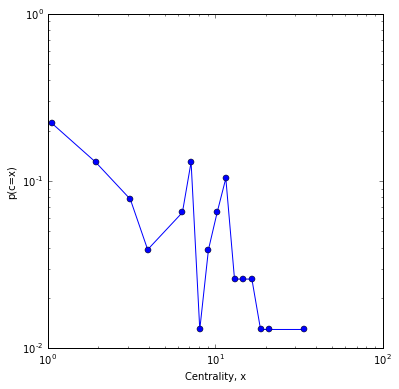

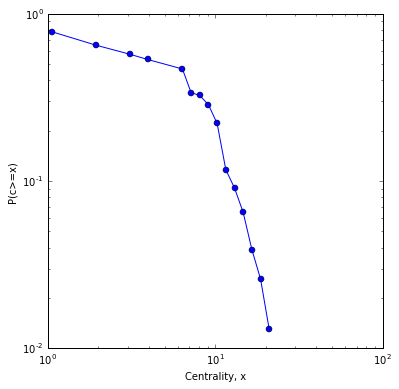

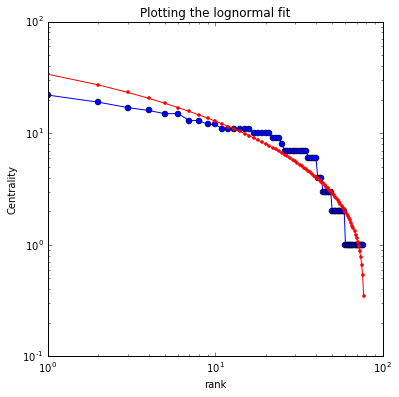

1.001930195522361

In [40]:
##analyzing the degree distribution for it  

d=np.array(nx.degree(G).values())
plt.figure(figsize = (6,6))
distribution(d,cdf=0,params=30)
plt.figure(figsize = (6,6))
distribution(d,cdf=1,params=30)
plt.figure(figsize = (6,6))
rankPlot(d,2,[1])  ##plotting the log normal fit . 